In [101]:
import numpy as np
import pandas as pd

In [102]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
df.shape

(10000, 14)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [105]:
df.duplicated().sum()

np.int64(0)

In [106]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [107]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [108]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [109]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [110]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [111]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [112]:
X = df.drop(columns=['Exited'])
y = df.Exited
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [113]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [114]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [115]:
X_train.shape

(8000, 11)

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   # we only transform the test set

In [117]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [118]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [119]:
model = Sequential()

model.add(Dense(11, activation='relu', input_shape=(11,)))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

d:\DeepLearning\MLP(ANN)\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [121]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7925 - loss: 0.5561 - val_accuracy: 0.7975 - val_loss: 0.4852
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8030 - loss: 0.4637 - val_accuracy: 0.7981 - val_loss: 0.4549
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.4364 - val_accuracy: 0.8075 - val_loss: 0.4418
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7982 - loss: 0.4445 - val_accuracy: 0.8106 - val_loss: 0.4333
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8142 - loss: 0.4394 - val_accuracy: 0.8175 - val_loss: 0.4269
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 0.4142 - val_accuracy: 0.8175 - val_loss: 0.4219
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8232 - loss: 0.4113 - val_accuracy: 0.8206 - val_loss: 0.4172
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.4082 - val_accu

In [122]:
model.layers[0].get_weights()

[array([[-0.15192175, -0.1829554 , -0.19854599,  0.18119349, -0.06792637,
          0.28357038,  0.0586866 ,  0.19417806,  0.02589286, -0.01444938,
          0.3150399 ],
        [ 0.5181904 ,  0.7340495 ,  0.30247912, -0.5961978 , -0.28744453,
         -0.31043664, -1.0150956 , -0.75560594,  1.4522091 ,  0.02884141,
         -0.56793   ],
        [ 0.12324071,  0.06780171, -0.48263168, -0.6218699 , -0.04546888,
          0.3224768 ,  0.24273928,  0.4086274 ,  0.29848403,  0.08403324,
         -0.01002015],
        [ 0.21711087, -0.2749306 , -0.18534115,  0.30967972, -0.16232188,
         -0.58354425, -0.03421047, -0.11579743,  0.07844755,  0.26442155,
         -0.06250091],
        [ 0.11326376, -0.07321946,  0.734761  ,  0.6528075 , -1.2383865 ,
         -0.60263216,  0.14174125,  0.18107632,  0.20505738,  1.1637914 ,
          0.36180782],
        [-0.45095834, -0.17088586, -0.55822253, -0.51165056, -0.35490048,
          0.28244385,  0.09698825,  0.34940678,  0.10848818, -0.0540281

In [123]:
model.layers[1].get_weights()

[array([[ 0.4036015 ,  0.0651871 ,  0.10737742,  0.08037627,  0.00883981,
          0.60484487,  0.27892488,  0.5353997 , -0.05740902,  0.39749813,
          0.40926263],
        [-0.32365963, -0.01154592,  0.13141897,  0.18859455,  0.68105817,
          0.50094   ,  0.31889457, -0.5365049 ,  0.3308386 , -0.38586247,
         -0.9043969 ],
        [-0.07411863,  0.37129557,  0.2917384 ,  0.54162705, -0.6642768 ,
         -0.16802707,  0.54280216,  0.45103815,  0.14898245, -0.1488124 ,
         -0.1800883 ],
        [ 0.37997276,  0.38509017, -1.1562414 , -0.22938275,  0.35496196,
         -0.48702493, -0.12149091, -0.11519412,  0.41994202, -0.37178877,
          0.4766063 ],
        [ 0.30810338, -0.28318986,  0.52638453,  0.503626  , -0.11910067,
         -0.2663981 , -1.015618  ,  0.27664527, -0.03464142, -0.15689051,
         -0.3762419 ],
        [-0.07060416,  0.16971058,  0.27093825, -0.19344941, -1.4738683 ,
         -0.23272248, -0.01021519,  0.11520737, -0.4072228 ,  0.0323643

In [124]:
y_log  = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [125]:
y_pred = np.where(y_log > 0.5, 1, 0)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.866

In [127]:
import matplotlib.pyplot as plt

In [128]:
history

In [129]:
history.history

{'accuracy': [0.7943750023841858,
  0.7971875071525574,
  0.8006250262260437,
  0.8087499737739563,
  0.8145312666893005,
  0.8201562762260437,
  0.8237500190734863,
  0.827343761920929,
  0.8310937285423279,
  0.8374999761581421,
  0.8439062237739563,
  0.848437488079071,
  0.8543750047683716,
  0.8575000166893005,
  0.8609374761581421,
  0.8623437285423279,
  0.8629687428474426,
  0.8637499809265137,
  0.8637499809265137,
  0.8642187714576721,
  0.8643749952316284,
  0.8648437261581421,
  0.8643749952316284,
  0.864062488079071,
  0.8651562333106995,
  0.8650000095367432,
  0.8659374713897705,
  0.8659374713897705,
  0.8643749952316284,
  0.8645312786102295,
  0.8656250238418579,
  0.8653125166893005,
  0.8643749952316284,
  0.864062488079071,
  0.8670312762260437,
  0.8654687404632568,
  0.8653125166893005,
  0.8648437261581421,
  0.8654687404632568,
  0.8657812476158142,
  0.8654687404632568,
  0.8671875,
  0.8653125166893005,
  0.8650000095367432,
  0.8668749928474426,
  0.8665624

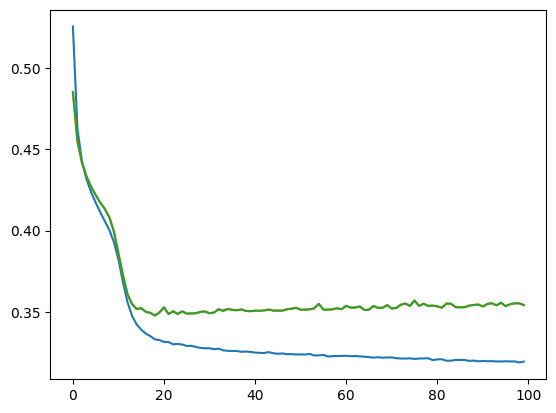

In [130]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.plot(history.history['val_loss'])

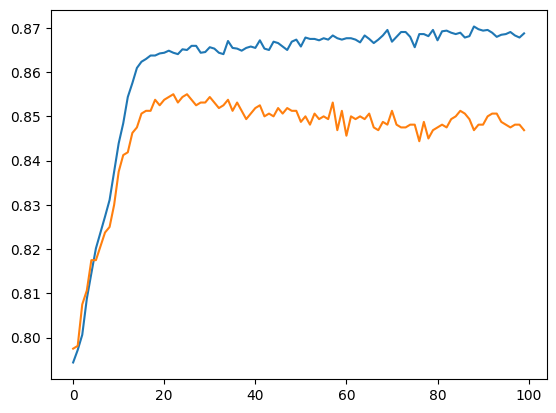

In [131]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])